<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.875 · Deep Learning · PEC1</p>
<p style="margin: 0; text-align:right;">2021-2 · Máster universitario en Ciencia de datos (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# PEC 1: Redes neuronales artificiales

En esta práctica implementaremos redes neuronales artificiales para resolver problemas de:

   - Clasificación
   - Regresión   


**Importante: La entrega debe hacerse en formato notebook y en formato html donde se vea el código y los resultados y comentarios de cada ejercicio. Para exportar el notebook a html puede hacerse desde el menú File $\to$ Download as $\to$ HTML.**

## 0. Contexto y carga de librerías

El siguiente código carga los paquetes necesarios para la práctica y lee el fichero de datos que usaremos.

Los datos contienen información sobre coches de segunda mano, sus características y el precio de re-venta en euros. En un primer ejercicio diseñaremos un modelo que nos permita clasificar los coches en tres grupos según su gama de precio. En el segundo ejercicio diseñaremos un modelo de regresión para predecir el precio de re-venta.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import timeit

import keras
from keras.models import Sequential, Model
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD, Adadelta, Adagrad

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, mean_squared_error, classification_report
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [2]:
##To read directly from Drive in Google Colab use:
from google.colab import drive
drive.mount('/content/drive')
#input path: "./drive/MyDrive/CarPricesData.pkl"

##To read in Kaggle, upload file in Kaggle 
##input path: "/kaggle/input/botnetdl/botnet_dataset_DL.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("/content/drive/My Drive/dataset.csv") #change path if needed

In [4]:
df.head(5)

,months_old,km,fuel_type,horsepower,metcolor,automatic,size_engine,doors_num,weight,price
0,73,97494,Petrol,110,1,0,1600,5,1085,10950
1,48,89049,Petrol,97,1,0,1400,5,1060,13500
2,40,161000,Diesel,69,1,0,1900,3,1105,13950
3,37,38812,Petrol,97,0,0,1400,3,1025,13450
4,55,33230,Petrol,110,0,0,1600,3,1050,13500


## 1. Exploración (1 punto)



En primer lugar exploraremos el conjunto de datos. 

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio (1 punto):</strong> Explora los datos: 

<ul>
        
<li> Indica el tamaño del dataset y el número de variables categóricas y continuas del conjunto de datos</li> 
<li>   Grafica las distribuciones de las variables categóricas y de las continuas</li>
<li>    Genera una tabla de correlaciones de todas las variables usando la librería <code>seaborn</code>, mostrando en cada casilla el valor de la correlación</li>
<li>    Genera una tabla (usando la librería <code>seaborn</code>) que muestre únicamente las correlaciones entre el precio y el resto de variables, ordenada de mayor a menor según los valores de correlación</li>
<li>  Comenta los resultados de la exploración de datos</li>
</ul>

</div>



*   **Variables**



In [5]:
#Dataset size
df.describe

<bound method NDFrame.describe of       months_old      km fuel_type  horsepower  metcolor  automatic  \
0             73   97494    Petrol         110         1          0   
1             48   89049    Petrol          97         1          0   
2             40  161000    Diesel          69         1          0   
3             37   38812    Petrol          97         0          0   
4             55   33230    Petrol         110         0          0   
...          ...     ...       ...         ...       ...        ...   
1431          48   78600    Petrol         110         1          0   
1432          80   86109    Petrol         110         1          0   
1433          77   82103    Petrol          86         1          0   
1434          40   38653    Petrol         110         1          0   
1435          59   43818    Petrol         110         0          0   

      size_engine  doors_num  weight  price  
0            1600          5    1085  10950  
1            1400    

In [6]:
#Number of categorical and continuous variables
num_categorical_variables = 4
num_continuous_variables = 6

*   **Distribuciones**





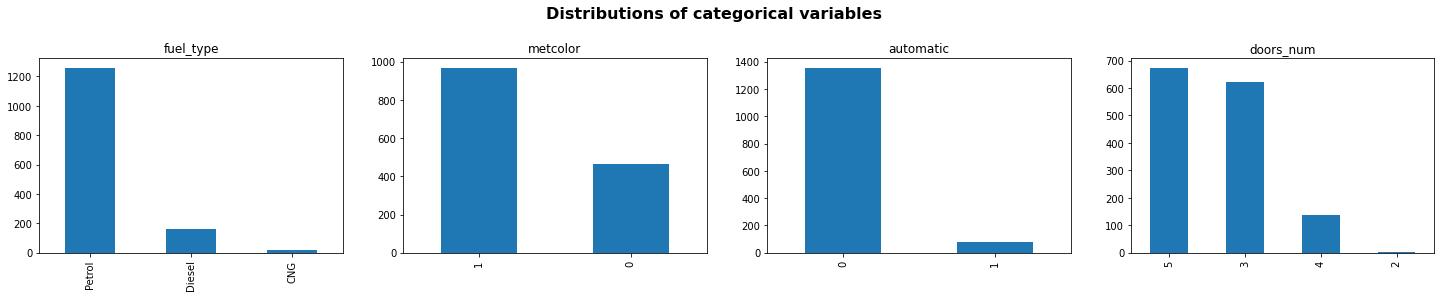

In [7]:
#Distributions of categorical variables
fig, ax = plt.subplots(nrows=1, ncols=num_categorical_variables, figsize=(25,4))

feats_to_explore = ['fuel_type', 'metcolor', 'automatic', 'doors_num']
for i in range(len(feats_to_explore)):
    df[feats_to_explore[i]].value_counts().plot.bar(ax=ax[i])
    ax[i].set_title(feats_to_explore[i])
    
plt.suptitle('Distributions of categorical variables', weight='bold', size=16)
fig.subplots_adjust(top=0.8)
plt.show()


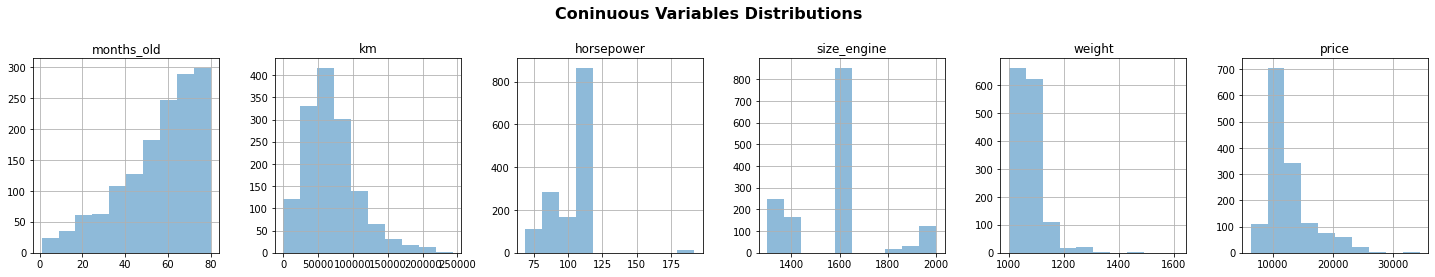

In [8]:
#Distributions continuous variables
fig, ax = plt.subplots(nrows=1, ncols=num_continuous_variables, figsize=(25,4))

feats_to_explore = ['months_old', 'km', 'horsepower', 'size_engine', 'weight', 'price']
for i in range(len(feats_to_explore)):
    df.hist(alpha=0.5, column=feats_to_explore[i], ax=ax[i])
    
plt.suptitle('Coninuous Variables Distributions', weight='bold', size=16)
fig.subplots_adjust(top=0.8)
plt.show()

*   **Correlaciones**




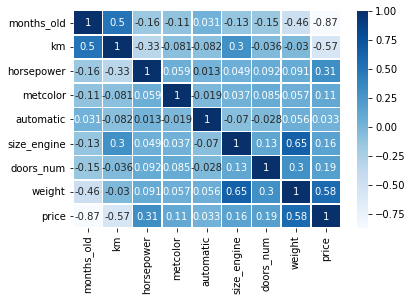

In [9]:
#All variables correlations
corr = df.corr()
ax = sns.heatmap(corr, cmap="Blues", annot=True, linewidths=.5)

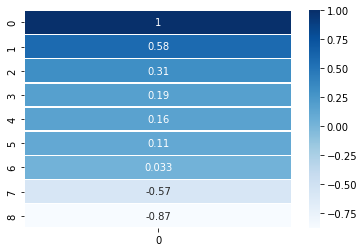

In [10]:
#Features correlating with Price
corr = df.corr()['price'][:]
corr = corr.sort_values(ascending=False)
corr = corr.to_numpy()
ax = sns.heatmap(corr[:, np.newaxis], cmap="Blues", annot=True, linewidths=.5)



*   **Comentarios resultado exploración**



In [11]:
#Comments


## 2. Red neuronal artificial: Clasificación (4.5 puntos)


En este apartado entrenaremos un modelo que intente clasificar los coches según su gama de precio. Para ello crearemos una nueva variable como indicador de calidad del coche (gama baja, media o alta), siguiendo las siguientes condiciones:



*   _low-end_: precio menor que 11000 euros
*   _medium-end_: precio mayor o igual que 11000 euros y menor que 13000
*   _high-end_: precio mayor o igual que 13000



### Pre-procesado


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio (0.75 puntos):</strong> Pre-procesa los datos: 

<ul>
        
<li>   Crea una nueva variable <code>quality</code> que incluya la gama del coche, con las condiciones indicadas</li>
<li>   Muestra el histograma de la nueva variable <code>quality</code></li>
<li>   Crea los vectores de variables dependientes (<i>features</i>) y de la variable independiente (<i>labels</i>)</li>
<li>   Normaliza debidamente los datos y binariza el vector de etiquetas (<i>labels</i>) </li>
<li>   Divide el conjunto de datos en 80% para entrenamiento y 20% para test, usando la función <code>train_test_split</code></li>
<li>   Muestra las dimensiones de los conjuntos de entrenamiento y test</li>
</ul>
</div>

In [12]:
#Create new variable: quality
df['quality'] = pd.cut(df['price'], bins=[0, 11001, 13001, float('Inf')], labels=['low-end', 'medium-end', 'high-end'])
df['quality']

0          low-end
1         high-end
2         high-end
3         high-end
4         high-end
           ...    
1431    medium-end
1432       low-end
1433       low-end
1434      high-end
1435    medium-end
Name: quality, Length: 1436, dtype: category
Categories (3, object): ['low-end' < 'medium-end' < 'high-end']

Text(0.5, 1.0, 'quality')

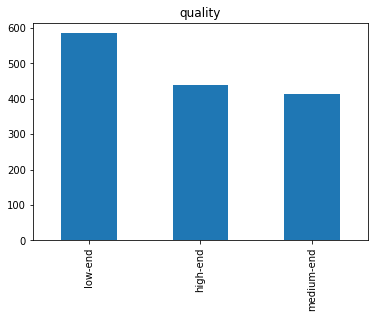

In [13]:
#Histogram car quality
ax = df['quality'].value_counts().plot.bar()
ax.set_title('quality')

In [14]:
df.describe

<bound method NDFrame.describe of       months_old      km fuel_type  horsepower  metcolor  automatic  \
0             73   97494    Petrol         110         1          0   
1             48   89049    Petrol          97         1          0   
2             40  161000    Diesel          69         1          0   
3             37   38812    Petrol          97         0          0   
4             55   33230    Petrol         110         0          0   
...          ...     ...       ...         ...       ...        ...   
1431          48   78600    Petrol         110         1          0   
1432          80   86109    Petrol         110         1          0   
1433          77   82103    Petrol          86         1          0   
1434          40   38653    Petrol         110         1          0   
1435          59   43818    Petrol         110         0          0   

      size_engine  doors_num  weight  price     quality  
0            1600          5    1085  10950     low-end

In [15]:
#Create features and labels vectors
features = df.drop(columns = ['quality', 'price'])
labels = df['quality']

In [16]:
features['fuel_type'] = features['fuel_type'].astype('category').cat.codes
features['fuel_type']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features

array([[ 0.91525566,  0.77242262,  0.3591837 , ...,  0.17461144,
         1.014941  ,  0.23427743],
       [-0.43109461,  0.5471829 ,  0.3591837 , ..., -0.89385359,
         1.014941  , -0.23947685],
       [-0.86192669,  2.46621463, -2.3132919 , ...,  1.777309  ,
        -1.08513865,  0.61328086],
       ...,
       [ 1.13067171,  0.36192356,  0.3591837 , ..., -1.42808611,
        -1.08513865, -1.09223456],
       [-0.86192669, -0.79694746,  0.3591837 , ...,  0.17461144,
         1.014941  ,  0.13952657],
       [ 0.16129951, -0.65918983,  0.3591837 , ...,  0.17461144,
         1.014941  , -0.04997514]])

In [17]:
##Normalize the corresponding data
#features['fuel_type'] = features['fuel_type'].astype('category').cat.codes
#features['fuel_type']

#scaler = StandardScaler()
#scaled_features = scaler.fit_transform(features)


## Normalize continuous data
## Since data is not normalized we will use Scalar to avoid outliers impact
## price is excluded since it will not be used in the model (is somehow the target).
#features['months_old'] = scaler.fit_transform(features['months_old'].values.reshape(-1,1))
#features['km'] = scaler.fit_transform(features['km'].values.reshape(-1,1))
#features['horsepower'] = scaler.fit_transform(features['horsepower'].values.reshape(-1,1))
#features['size_engine'] = scaler.fit_transform(features['size_engine'].values.reshape(-1,1))
#features['weight'] = scaler.fit_transform(features['weight'].values.reshape(-1,1))

#features

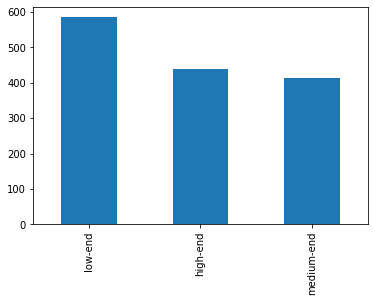

In [18]:
# Check labels distribution
ax = labels.value_counts().plot.bar()

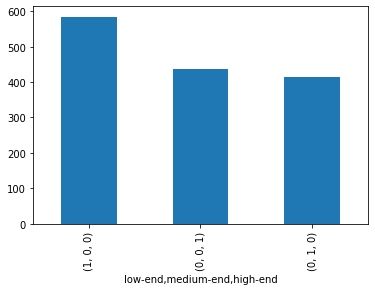

In [19]:
#Binarize the labels
binary_labels = pd.get_dummies(labels)
# Check labels distribution
ax = binary_labels.value_counts().plot.bar()

In [20]:
#Train-test split
myseed= 38

X_train, X_test, y_train, y_test = train_test_split(
    scaled_features, binary_labels, test_size=0.8, random_state=myseed)

In [21]:
#Shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((287, 9), (1149, 9), (287, 3), (1149, 3))

|        | X_train   | X_test     | y_train | y_test  |
|--------|-----------|------------|---------|---------|
| Shapes | (287, 9) | (1149, 9) | (287,3)  | (1149,3) |

### Modelo base


Empezaremos diseñando un modelo base con 4 capas ocultas.
 
Nota: Para el ajuste del modelo usaremos los datos de test como conjunto de validación.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio (1.25 puntos):</strong> Implementa el modelo de red neuronal artificial:
<ul>
<li>   Diseña la arquitectura para el modelo de clasificación con la función de activación adecuada para la capa de salida y con las siguientes características:</li>
   <ul>
   <li> 4 capas ocultas con 64, 32, 10, 8 neuronas sucesivamente</li>
   <li> Función de activación de las capas intermedias: ReLU</li>
   </ul>

<li>   Compila el modelo con la función de pérdida más adecuada, el optimizador Adam, una velocidad de aprendizaje de 0.1, y la métrica Accuracy.</li>

<li>   Ajusta el modelo con 20 épocas y un tamaño del batch de 64</li>

<li>   Muestra las gráficas de accuracy y loss. En cada gráfica debe visualizarse la curva de entrenamiento y la de validación</li>
</ul>
</div>

In [22]:
#Create ANN model
model = Sequential()

# Input layer
model.add(keras.Input(shape=(9,)))

# Hidden layers
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(8, activation="relu"))

# Output layer
model.add(Dense(3, activation="softmax"))

model.build()

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
 dense_3 (Dense)             (None, 8)                 88        
                                                                 
 dense_4 (Dense)             (None, 3)                 27        
                                                                 
Total params: 3,165
Trainable params: 3,165
Non-trainable params: 0
_________________________________________________________________


In [24]:
#Compile
# Compila el modelo con la función de pérdida más adecuada, 
  #el optimizador Adam, una velocidad de aprendizaje de 0.1, y la métrica Accuracy.
model.compile(Adam(learning_rate=0.1), "categorical_crossentropy", metrics=["accuracy"])

In [25]:
#Fit

# Encode features
history = model.fit(X_train, y_train, epochs=20, batch_size=64)

Epoch 1/20
5/5 [==============================] - 1s 7ms/step - loss: 0.9350 - accuracy: 0.5679
Epoch 2/20
5/5 [==============================] - 0s 7ms/step - loss: 0.9123 - accuracy: 0.5645
Epoch 3/20
5/5 [==============================] - 0s 5ms/step - loss: 0.7772 - accuracy: 0.6655
Epoch 4/20
5/5 [==============================] - 0s 4ms/step - loss: 0.7876 - accuracy: 0.6237
Epoch 5/20
5/5 [==============================] - 0s 4ms/step - loss: 0.9491 - accuracy: 0.6376
Epoch 6/20
5/5 [==============================] - 0s 5ms/step - loss: 0.7578 - accuracy: 0.6446
Epoch 7/20
5/5 [==============================] - 0s 4ms/step - loss: 0.7413 - accuracy: 0.6516
Epoch 8/20
5/5 [==============================] - 0s 4ms/step - loss: 0.7255 - accuracy: 0.6655
Epoch 9/20
5/5 [==============================] - 0s 6ms/step - loss: 0.7232 - accuracy: 0.6690
Epoch 10/20
5/5 [==============================] - 0s 5ms/step - loss: 0.6905 - accuracy: 0.6794
Epoch 11/20
5/5 [======================

In [26]:
history.params

{'epochs': 20, 'steps': 5, 'verbose': 1}

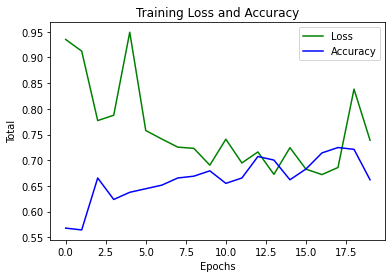

In [27]:
#Plots 
loss = history.history['loss']
accuracy = history.history['accuracy']
epochs = range(0,20)

plt.plot(epochs, loss, 'g', label='Loss')
plt.plot(epochs, accuracy, 'b', label='Accuracy')
plt.title('Training Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Total')
plt.legend()
plt.show()

### Influencia velocidad aprendizaje y optimizador

Una vez tenemos el modelo base, analizaremos la influencia que pueden tener la velocidad de aprendizaje y el tipo de optimizador en la mejora del rendimiento.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio (1.5 puntos):</strong> Implementa una función para entrenar la arquitectura del ejercicio anterior para 4 optimizadores diferentes: Adam, SGD, Adadelta, Adagrad, y 4 velocidades de aprendizaje: 0.001, 0.01, 0.05, 0.1. 
Entrena los modelos, y representa dos gráficas:
 <ul>
     <li> Tiempo de entrenamiento vs Velocidad de aprendizaje</li>
     <li>  <i>Accuracy</i> vs Velocidad de aprendizaje</li>
</ul>   
    
Cada gráfica debe incluir la evolución obtenida por los cuatro optimizadores para poderlos comparar mejor.
    
-----------------------------------------------------------------------------------------------------------
<b>Importante</b>: para la entrega de la PEC, fijar el parámetro <code>verbose = 0</code> en el entrenamiento de los modelos. La solución únicamente debe mostrar las gráficas resultantes.
</div>

In [37]:
#Function to compute several models changing Optimizers and learning rate
def compute(model):
  rates = [0.001, 0.01, 0.05, 0.1]
  optimizers = []
  result = []
  for r in range(len(rates)):
    optimizers.append([Adam(learning_rate=rates[r]), "Adam", rates[r]])
    optimizers.append([SGD(learning_rate=rates[r]), "SGD", rates[r]])
    optimizers.append([Adadelta(learning_rate=rates[r]), "Adadelta", rates[r]])
    optimizers.append([Adagrad(learning_rate=rates[r]), "Adagrad", rates[r]])

  for i in range(len(optimizers)):
    optimizer = optimizers[i]
    model.compile(optimizer[0], "categorical_crossentropy", metrics=["accuracy"])
    t0 = timeit.default_timer()
    history = model.fit(X_train, y_train, epochs=20, batch_size=64, verbose=0)
    training_time = timeit.default_timer() - t0
    print("The time difference is :", training_time)
    avg_accuracy = np.mean(history.history['accuracy'])
    result.append([optimizer[1], optimizer[2], training_time, avg_accuracy])
  return result

In [38]:
#Compute models
c = compute(model)


The time difference is : 0.7470417810000072
The time difference is : 0.626849004000178
The time difference is : 0.674530047999724
The time difference is : 0.6371783029990183
The time difference is : 1.1205076429996552
The time difference is : 0.7616398779991869
The time difference is : 0.825449504000062
The time difference is : 0.7768255909995787
The time difference is : 0.7227368590010883
The time difference is : 0.7694264089986973
The time difference is : 0.6962969329997577
The time difference is : 0.7713414390000253
The time difference is : 0.7361320750005689
The time difference is : 0.6136702900003002
The time difference is : 0.8566282379997574
The time difference is : 0.6347689960002754


In [57]:
#Plots

# distribuir el resultado en variables más legibles
opts = []
times = []
rates = []
acc = []
for i in range(len(c)):
  m = c[i]
  opts.append(m[0])
  rates.append(m[1])
  times.append(m[2]) 
  acc.append(m[3])

# Variables para las coordenadas de las lineas
adam_rates = []
adam_accuracy = []
adam_times = []
sgd_rates = []
sgd_accuracy = []
sgd_times = []
adagrad_rates = []
adagrad_accuracy = []
adagrad_times = []
adadelta_rates = []
adadelta_accuracy = []
adadelta_times = []

# Transformacion de variables
for i in range(len(times)):
  if opts[i] == 'Adam':
    adam_rates.append(rates[i])
    adam_times.append(times[i])
    adam_accuracy.append(acc[i])
  elif opts[i] == 'SGD':
    sgd_rates.append(rates[i])
    sgd_times.append(times[i])
    sgd_accuracy.append(acc[i])
  elif opts[i] == 'Adagrad':
    adagrad_rates.append(rates[i])
    adagrad_times.append(times[i])
    adagrad_accuracy.append(acc[i])
  elif opts[i] == 'Adadelta':
    adadelta_rates.append(rates[i])
    adadelta_times.append(times[i]) 
    adadelta_accuracy.append(acc[i])

fig, ax = plt.subplots(1,2, figsize=(15,8))

learning_rates = [0.001, 0.01, 0.05, 0.1]
ax[0].set_xticks=([0, 5, 10, 20], labels=learning_rates)
#ax[0].set_xticklabels(learning_rates)

ax[0].plot(adam_rates, adam_times, linestyle='--', marker='o', color='g', label='Adam')
ax[0].plot(sgd_rates, sgd_times, linestyle='--', marker='o', color='y', label='SGD')
ax[0].plot(adagrad_rates, adagrad_times, linestyle='--', marker='o', color='b', label='Adagrad')
ax[0].plot(adadelta_rates, adadelta_times, linestyle='--', marker='o', color='r', label='Adadelta')
ax[0].set_title('Training Time vs Learning Rates')
ax[0].set_xlabel('Learning Rates')
ax[0].set_ylabel('Training Time')

ax[1].set_xticklabels(learning_rates, minor=False)
ax[1].plot(adam_rates, adam_accuracy, linestyle='--', marker='o', color='g', label='Adam')
ax[1].plot(sgd_rates, sgd_accuracy, linestyle='--', marker='o', color='y', label='SGD')
ax[1].plot(adagrad_rates, adagrad_accuracy, linestyle='--', marker='o', color='b', label='Adagrad')
ax[1].plot(adadelta_rates, adadelta_accuracy, linestyle='--', marker='o', color='r', label='Adadelta')
ax[1].set_title('Accuracy vs Learning Rates')
ax[1].set_xlabel('Learning Rates')
ax[1].set_ylabel('Accuracy')
plt.legend()
plt.show()

SyntaxError: ignored

### Elección del mejor modelo

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio (1 punto):</strong> Identifica el valor de la velocidad de aprendizaje y del optimizador que mejor rendimiento dan al modelo, según los resultados del ejercicio anterior:
<ul>
    
<li>   Justifica la elección</li>
<li>   Compila y entrena el modelo elegido</li>
<li>   Muestra las correspondientes gráficas de <i>Accuracy</i> y <i>Loss</i> de los conjuntos de entrenamiento y validación, e indica el <i>Accuracy</i> del modelo </li>
<li>   Muestra la matriz de confusión multi-clase con las etiquetas originales de <code>quality</code> (<i>low-end</i>, <i>medium-end</i>, <i>high-end</i>)</li>
<li>   Muestra la precisión, recall y F1-score resultantes para cada etiqueta</li>
<li>   Comenta los resultados obtenidos</li>
</ul>
</div>

In [ ]:
#Best model justification


In [ ]:
#Create, compile and fit ANN BEST model


In [ ]:
#Plots


In [ ]:
#Confusion matrix


In [ ]:
#Accuracy


In [ ]:
#Precision, Recall and F1-score for each label


In [ ]:
#Comment results


## 3. Red neuronal artificial: Regresión (4.5 puntos)

En este apartado resolveremos un problema de regresión intentando predecir el precio de re-venta según las características de los coches. Partiremos del conjunto de datos original.

### Pre-procesado




<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio (0.5 puntos):</strong> Pre-procesa los datos: 
<ul>
<li>   Crea los vectores de variables dependientes (<i>features</i>) y de la variable independiente (<i>target</i>)</li>
<li>   Normaliza debidamente los datos</li>
<li>   Divide el conjunto de datos en 70% para entrenamiento y 30% para test, usando la función <code>train_test_split</code></li>
<li>   Muestra las dimensiones de los conjuntos de entrenamiento y test</li>
</ul>
</div>

In [ ]:
#Create features and target vectors
features = None
target = None

In [ ]:
#Normalizing the data


In [ ]:
#Split train-test


In [ ]:
#Dimensions


### Modelo base

En primer lugar diseñaremos un modelo base con tres capas ocultas.

Nota: Para el ajuste del modelo usaremos los datos de test como conjunto de validación.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio (1 punto):</strong> Implementa el modelo de red neuronal artificial:
<ul>
<li>Diseña la arquitectura para el modelo de regresión con las siguientes características:</li>
    <ul>
   <li>1 primera capa oculta completamente conectada de 128 neuronas y activación ReLU</li>
   <li>2 capas ocultas de 32 y 16 neuronas y activación tangencial</li>
   <li>Todas las capas deben tener <code>kernel_initizalizer</code> en modo 'normal'</li>
   </ul>
<li>Compila el modelo con la función de pérdida más adecuada y el optimizador Adam</li>

<li>Ajusta el modelo con 50 épocas y un tamaño del batch de 32</li>

<li>Muestra la gráfica de pérdida. En la gráfica debe visualizarse la curva de entrenamiento y la de validación</li>
</ul>
</div>

In [ ]:
#Create ANN model


In [ ]:
#Compiling the model


In [ ]:
#Fit model


In [ ]:
#Plots


### Búsqueda hiperparámetros

Una vez tenemos el modelo base nos interesa buscar la configuración de hiperparámetros que nos proporcione una mejor predicción del precio de re-venta de los coches. En este apartado haremos una búsqueda de hiperparámetros, recorriendo varios valores de número de capas, número de neuronas, tamaño del batch y épocas.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio (1.75 puntos):</strong> Implementa una función que evalúe distintos modelos combinando las siguientes características:
<ul>    
   <li>Tres arquitecturas diferentes con las siguientes configuraciones de número de capas ocultas (completamente conectadas) y número de neuronas en cada capa:</li>
        <ul>
        <li>[128, 64, 16]</li>
        <li>[16, 4]</li>
        <li>[4, 4]</li>
        </ul> 
   <li>Tamaño del batch de 16 y 32</li>
   <li>Épocas de 20, 50 y 100</li>
</ul>   
    
    
Como en el ejercicio anterior, la primera capa oculta tendrá siempre activación ReLU y las demás activación tangencial. El inicializador de kernel estará en modo 'normal' y usaremos el optimizador Adam.

    
La función deberá proporcionar una tabla con los siguientes campos: arquitectura de la red seleccionada, épocas, tamaño del batch, tiempo de entrenamiento, y raíz del error cuadrático medio (RMSE) del modelo 

-----------------------------------------------------------------------------------------------------------
<b>Importante</b>: para la entrega de la PEC, fijar el parámetro <code>verbose = 0</code> en el entrenamiento de los modelos. La solución únicamente debe mostrar la tabla resultante.
</div>

In [ ]:
#Hiperparameter search function


In [ ]:
#Compute search


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio (0.25 puntos):</strong> Representa en un gráfico el RMSE vs la configuración de los modelos 

</div>

In [ ]:
#Plot


### Elección mejor modelo y predicción

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio (1 punto):</strong> Identifica la configuración que proporciona mejores resultados:
<ul> 
<li>Justifica la elección del modelo</li>
<li>Compila y entrena el modelo elegido. Nota: para la entrega, presentar con verbose=0</li>
<li>Muestra la correspondiente gráfica de pérdida de los conjuntos de entrenamiento y validación</li>
<li>Calcula las predicciones del precio y muestra en una tabla el Precio original (<code>price</code>) y el Precio predicho (<code>predicted_price</code>) para las 10 primeras filas del conjunto de test</li>
<li>Comenta los resultados obtenidos</li>
</ul> 
</div>

In [ ]:
#Best configuration justification


In [ ]:
#Create, compile and fit ANN best model


In [ ]:
#Plot


In [ ]:
#Generate Predictions on testing data


In [ ]:
#Comment results
